<a href="https://colab.research.google.com/github/jnielsonresearch/Machine-Learning-Templates/blob/master/Classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification ML Models

## Importing the libraries

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas.util.testing as tm

In [4]:
# Plotting configuration for Jupyter notebook
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Importing the dataset

In [5]:
# Download the data
import os
datapath = os.path.join("Data", "")

files = ['playoff_boxscores.csv', 'team_box_hustle.csv']
  
# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/jnielsonresearch/crunch-time-analytics/Hustle Stats Research/"
os.makedirs(datapath, exist_ok=True)
for filename in files:
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "Data/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

playoff_boxscores = pd.read_csv(datapath + files[0])
team_box_hustle = pd.read_csv(datapath + files[1])

In [6]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


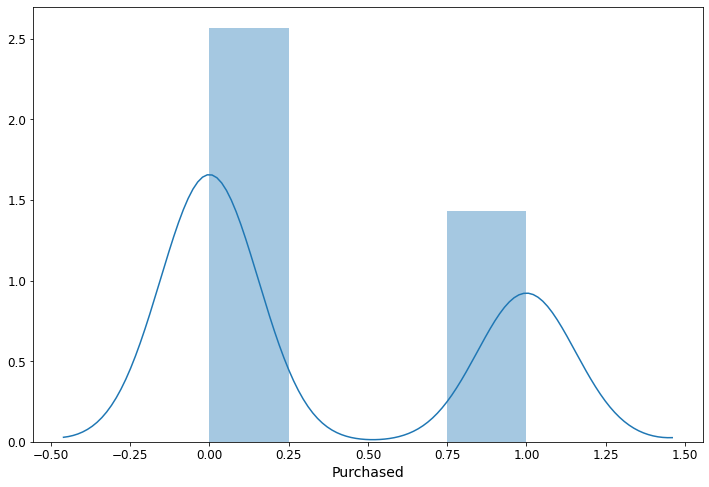

In [8]:
# Distribution plot of dependent variable y 
plt.figure(figsize=(12,8))
sns.distplot(dataset['Purchased'])

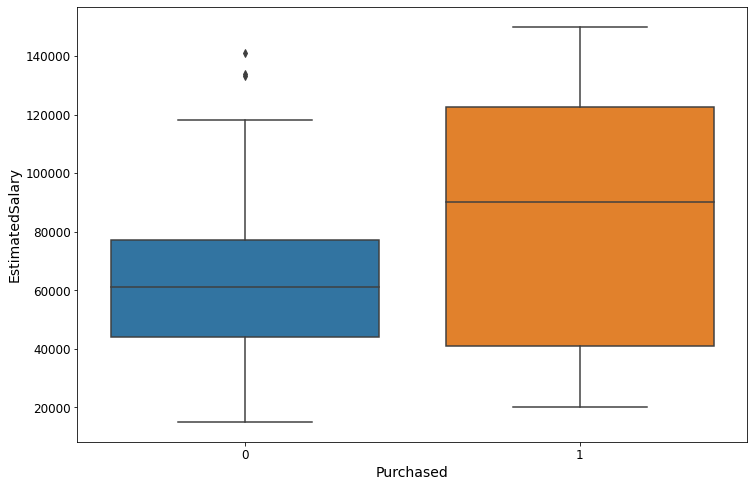

In [9]:
# Purchased by Estimated Salary
plt.figure(figsize=(12,8))
sns.boxplot(data=dataset, x='Purchased',y='EstimatedSalary')

## Pairplot and Covariance Matrix

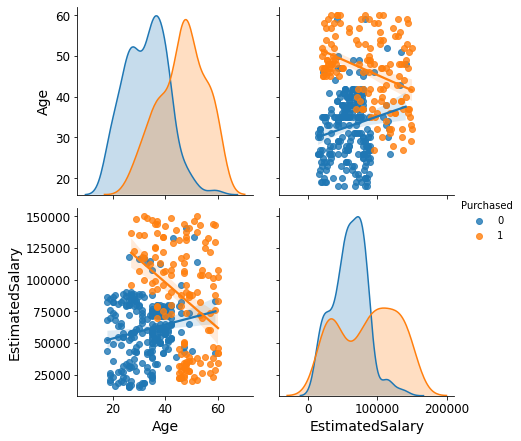

In [10]:
num_cols = dataset.select_dtypes('number').columns
sns.pairplot(dataset, height=3.0, kind='reg', hue='Purchased')

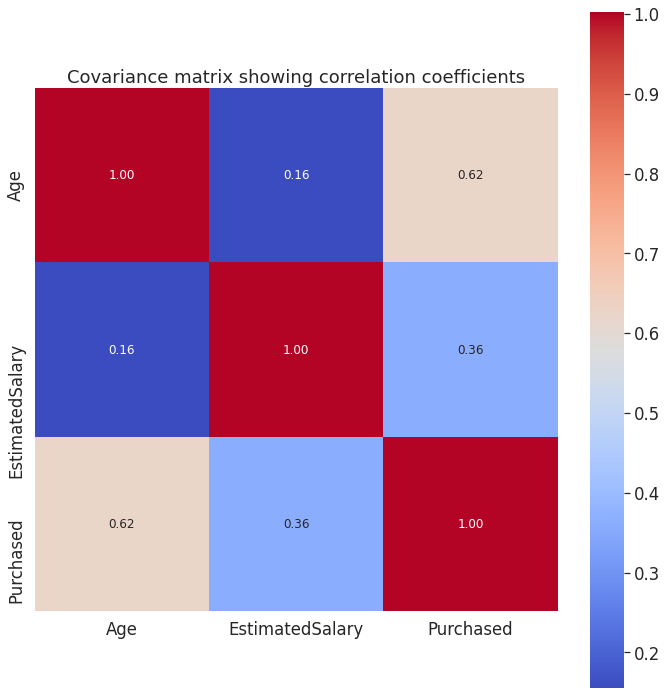

In [11]:
from sklearn.preprocessing import StandardScaler 
stdsc = StandardScaler() 
num_cols = dataset.select_dtypes('number').columns
X_std = stdsc.fit_transform(dataset[num_cols])
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=num_cols,
                 xticklabels=num_cols)
plt.title('Covariance matrix showing correlation coefficients', size = 18)
plt.tight_layout()
plt.show()

## Encoding categorical data

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))

In [ ]:
# X[0:5,:]

## Scaling and Train Test Split of Dataset

In [12]:
# encode class values as integers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression Model on Training and Test sets

Logistic Regression Model:
               precision    recall  f1-score   support

     class 0       0.91      1.00      0.95        58
     class 1       1.00      0.73      0.84        22

    accuracy                           0.93        80
   macro avg       0.95      0.86      0.90        80
weighted avg       0.93      0.93      0.92        80

Confusion Matrix:
 [[58  0]
 [ 6 16]]

Average Cross Validation Score:  0.8

Average Precision-Recall Score: 0.80


Text(0.5, 1.0, '2-class Precision-Recall Curve: AP=0.80')

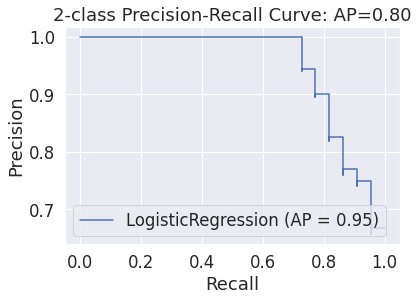

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print("Logistic Regression Model:\n", classification_report(y_test, y_test_pred, target_names=target_names))

# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n",cm)

# Average Cross Validation Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(classifier, X_train, y_train, cv=10, scoring="accuracy")
print("\nAverage Cross Validation Score: ", round(np.mean(cv),2))

# Average Precision Score and Precision-Recall curve
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_test_pred)
print('\nAverage Precision-Recall Score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall Curve: '
                   'AP={0:0.2f}'.format(average_precision))

### Visualizing model on the Training set

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


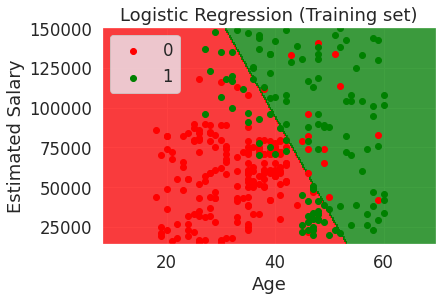

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = scaler.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualizing model on the Test set


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


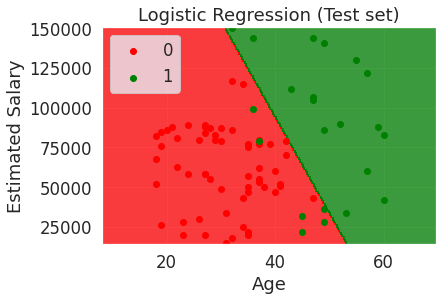

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = scaler.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Schochastic Gradient Decent Classifier Model

Schochastic Gradient Decent Classifier Model:
               precision    recall  f1-score   support

     class 0       0.85      1.00      0.92        58
     class 1       1.00      0.55      0.71        22

    accuracy                           0.88        80
   macro avg       0.93      0.77      0.81        80
weighted avg       0.89      0.88      0.86        80

Confusion Matrix:
 [[58  0]
 [10 12]]

Average Cross Validation Score:  0.81

Average Precision-Recall Score: 0.67


Text(0.5, 1.0, '\n2-class Precision-Recall Curve: AP=0.67')

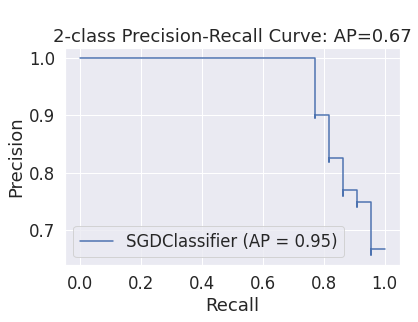

In [ ]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print("Schochastic Gradient Decent Classifier Model:\n", classification_report(y_test, y_test_pred, target_names=target_names))

# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n",cm)

# Average Cross Validation Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(classifier, X_train, y_train, cv=10, scoring="accuracy")
print("\nAverage Cross Validation Score: ", round(np.mean(cv),2))

# Average Precision Score and Precision-Recall curve
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_test_pred)
print('\nAverage Precision-Recall Score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('\n2-class Precision-Recall Curve: '
                   'AP={0:0.2f}'.format(average_precision))



## KNN Classification Model

KNeighborsClassifier Model:
               precision    recall  f1-score   support

     class 0       0.98      0.95      0.96        58
     class 1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80

Confusion Matrix:
 [[55  3]
 [ 1 21]]

Average Cross Validation Score:  0.9

Average Precision-Recall Score: 0.85


Text(0.5, 1.0, '2-class Precision-Recall Curve: AP=0.85')

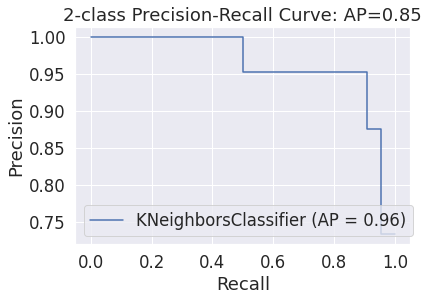

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print("KNeighborsClassifier Model:\n", classification_report(y_test, y_test_pred, target_names=target_names))

# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n",cm)

# Average Cross Validation Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(classifier, X_train, y_train, cv=10, scoring="accuracy")
print("\nAverage Cross Validation Score: ", round(np.mean(cv),2))

# Average Precision Score and Precision-Recall curve
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_test_pred)
print('\nAverage Precision-Recall Score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall Curve: '
                   'AP={0:0.2f}'.format(average_precision))

## Support Vector Machine Classification Model

Support Vector Machine Classification Model:
               precision    recall  f1-score   support

     class 0       0.98      0.95      0.96        58
     class 1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80

Confusion Matrix:
 [[55  3]
 [ 1 21]]

Average Cross Validation Score:  0.9

Average Precision-Recall Score: 0.85


Text(0.5, 1.0, '2-class Precision-Recall Curve: AP=0.85')

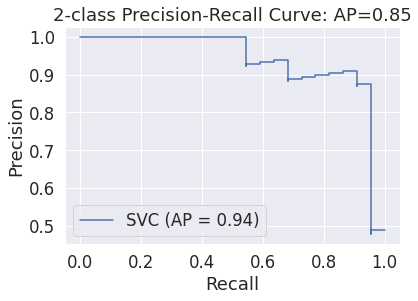

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print("Support Vector Machine Classification Model:\n", classification_report(y_test, y_test_pred, target_names=target_names))

# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n",cm)

# Average Cross Validation Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(classifier, X_train, y_train, cv=10, scoring="accuracy")
print("\nAverage Cross Validation Score: ", round(np.mean(cv),2))

# Average Precision Score and Precision-Recall curve
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_test_pred)
print('\nAverage Precision-Recall Score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall Curve: '
                   'AP={0:0.2f}'.format(average_precision))

## Naive Bayes Classification Model

Naive Bayes Classification Model:
               precision    recall  f1-score   support

     class 0       0.93      0.95      0.94        58
     class 1       0.86      0.82      0.84        22

    accuracy                           0.91        80
   macro avg       0.89      0.88      0.89        80
weighted avg       0.91      0.91      0.91        80

Confusion Matrix:
 [[55  3]
 [ 4 18]]

Average Cross Validation Score:  0.87

Average Precision-Recall Score: 0.75


Text(0.5, 1.0, '2-class Precision-Recall Curve: AP=0.75')

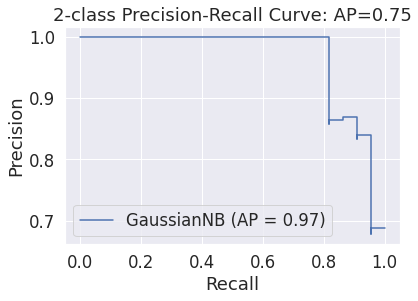

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print("Naive Bayes Classification Model:\n", classification_report(y_test, y_test_pred, target_names=target_names))

# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n",cm)

# Average Cross Validation Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(classifier, X_train, y_train, cv=10, scoring="accuracy")
print("\nAverage Cross Validation Score: ", round(np.mean(cv),2))

# Average Precision Score and Precision-Recall curve
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_test_pred)
print('\nAverage Precision-Recall Score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall Curve: '
                   'AP={0:0.2f}'.format(average_precision))

## Random Forest Classification Model

Random Forest Classification Model:
               precision    recall  f1-score   support

     class 0       0.96      0.95      0.96        58
     class 1       0.87      0.91      0.89        22

    accuracy                           0.94        80
   macro avg       0.92      0.93      0.92        80
weighted avg       0.94      0.94      0.94        80

Confusion Matrix:
 [[55  3]
 [ 2 20]]

Average Cross Validation Score:  0.89

Average Precision-Recall Score: 0.82


Text(0.5, 1.0, '2-class Precision-Recall Curve: AP=0.82')

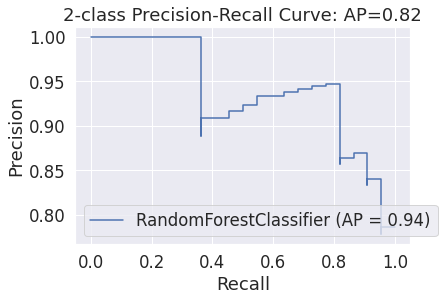

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print("Random Forest Classification Model:\n", classification_report(y_test, y_test_pred, target_names=target_names))

# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n",cm)

# Average Cross Validation Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(classifier, X_train, y_train, cv=10, scoring="accuracy")
print("\nAverage Cross Validation Score: ", round(np.mean(cv),2))

# Average Precision Score and Precision-Recall curve
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_test_pred)
print('\nAverage Precision-Recall Score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall Curve: '
                   'AP={0:0.2f}'.format(average_precision))

## Artifical Neural Network Classification Model using Tensorflow 2 and Keras

In [ ]:
import tensorflow as tf
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [ ]:
X_train.shape

(320, 2)

In [ ]:
model = Sequential()

model.add(Dense(X_train.shape[1],activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(X_train.shape[1] // 2,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(X_train.shape[1] // 3,activation='relu'))
model.add(Dense(10, activation='softmax'))

# For a binary classification problem
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=X_train, 
          y=y_train, 
          batch_size=100,epochs=500, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback, early_stop])

Epoch 1/500
1/4 [======>.......................] - ETA: 0s - loss: 0.9403 - accuracy: 0.6200WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
4/4 [==============================] - 0s 57ms/step - loss: 0.9362 - accuracy: 0.6219 - val_loss: 0.7096 - val_accuracy: 0.7250
Epoch 2/500
4/4 [==============================] - 0s 6ms/step - loss: 0.9362 - accuracy: 0.6219 - val_loss: 0.7096 - val_accuracy: 0.7250
Epoch 3/500
4/4 [==============================] - 0s 7ms/step - loss: 0.9362 - accuracy: 0.6219 - val_loss: 0.7096 - val_accuracy: 0.7250
Epoch 4/500
4/4 [==============================] - 0s 7ms/step - loss: 0.9362 - accuracy: 0.6219 - val_loss: 0.7096 - val_accuracy: 0.7250
Epoch 5/500
4/4 [==============================] - 0s 7ms/step - loss: 0.9362 - accur

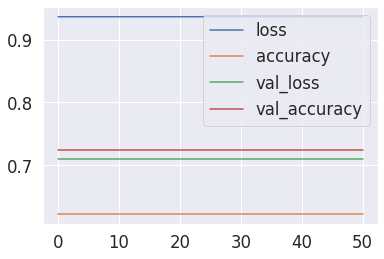

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
predictions = np.argmax(model.predict(X_test), axis=-1)

# Classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print("ANN Classification Model:\n", classification_report(y_test, predictions, target_names=target_names))

# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,predictions)
print("Confusion Matrix:\n",cm)

ANN Classification Model:
               precision    recall  f1-score   support

     class 0       0.72      1.00      0.84        58
     class 1       0.00      0.00      0.00        22

    accuracy                           0.73        80
   macro avg       0.36      0.50      0.42        80
weighted avg       0.53      0.72      0.61        80

Confusion Matrix:
 [[58  0]
 [22  0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


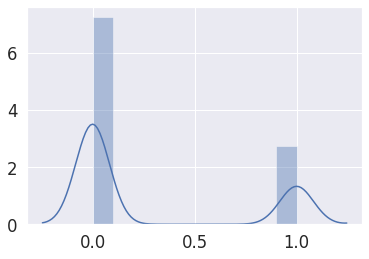

In [ ]:
errors = y_test.reshape(y_test.shape[0], 1) - predictions
sns.distplot(errors)

In [ ]:
!tensorboard dev upload --logdir ./logs

2020-08-21 02:11:22.056494: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&sc

In [19]:
!tensorboard dev auth revoke

2020-08-21 16:45:22.285600: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Logged out of uploader.
